In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import kmapper as km
from cereeberus import Interleave, ReebGraph, MapperGraph, Assignment

In [14]:
def draw_alphabet(samples, labels):
    fig, axes = plt.subplots(3, 3, figsize=(9, 9))
    for ax, sample in zip(axes.flatten(), samples):
        ax.scatter(sample[:, 0], sample[:, 1], s=1)
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 2)
        ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()

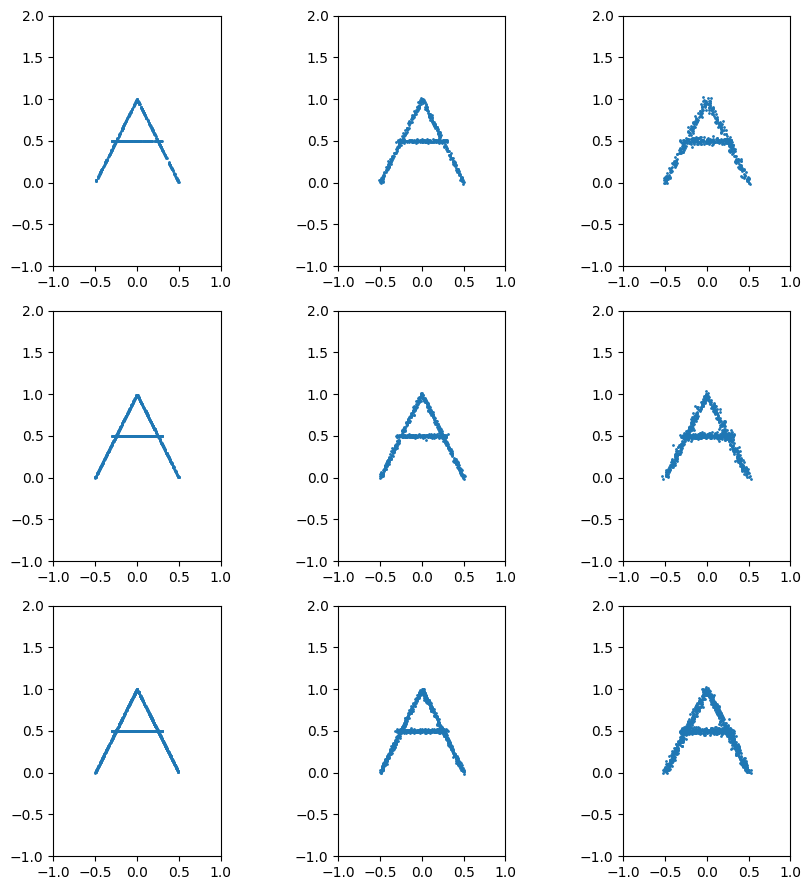

In [15]:
def generate_letter_A_variable(num_points=1000, noise_std=0.0):
    points = []
    # Left diagonal (random sampling)
    t = np.random.rand(num_points // 3)
    points.extend(t[:, None] * np.array([0.5, 1.0]) + (1 - t)[:, None] * np.array([0.0, 0.0]))
    # Right diagonal (random sampling)
    t = np.random.rand(num_points // 3)
    points.extend(t[:, None] * np.array([1.0, 0.0]) + (1 - t)[:, None] * np.array([0.5, 1.0]))
    # Crossbar (random sampling)
    t = np.random.rand(num_points // 3)
    points.extend(t[:, None] * np.array([0.8, 0.5]) + (1 - t)[:, None] * np.array([0.2, 0.5]))
    points = np.array(points)
    points[:, 0] -= 0.5  # Center
    if noise_std > 0:
        points += np.random.normal(0, noise_std, points.shape)
    return points
sample_a = []
for num_points in [500, 700, 1000]:
    for noise in [0.0, 0.01, 0.02]:
        sample = generate_letter_A_variable(num_points, noise)
        sample_a.append(sample)

       
# draw
draw_alphabet(sample_a, ['A'] * len(sample_a))

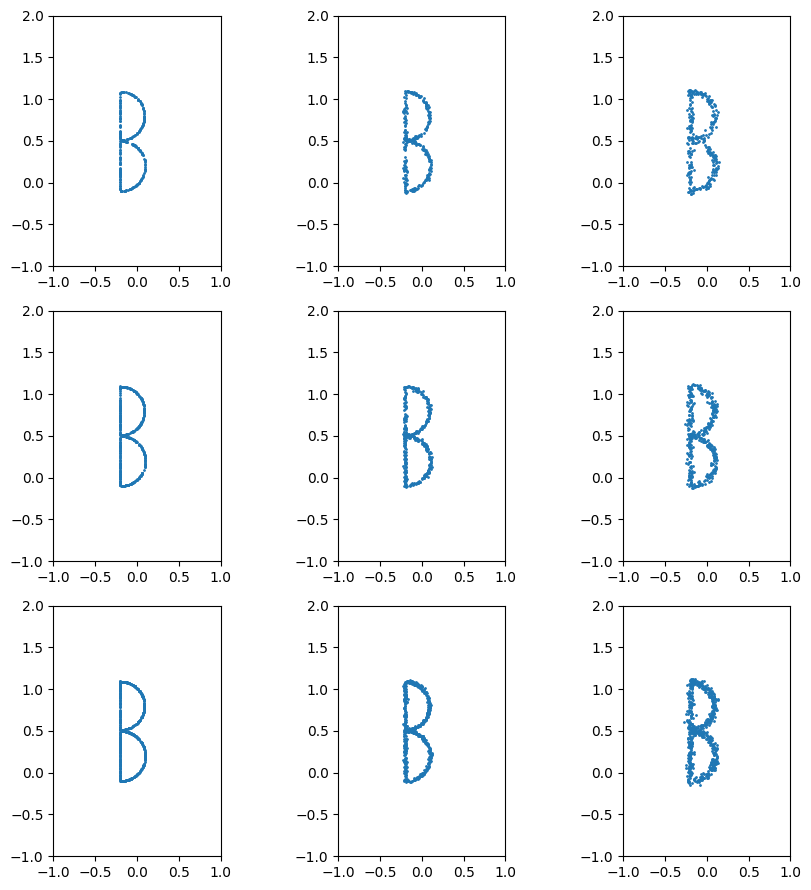

In [16]:
def generate_letter_B_variable(num_points=1000, noise_std=0.0):
    points = []
    # Vertical stem
    t = np.random.rand(num_points // 5)
    points.extend(t[:, None] * np.array([0.0, 1.1]) + (1 - t)[:, None] * np.array([0.0, -0.1]))
    # Top curve (semi-circle)
    angles = np.random.rand(num_points // 5) * np.pi - np.pi/2
    x = 0.29 * np.cos(angles) + 0.0
    y = 0.29 * np.sin(angles) + 0.8
    points.extend(np.column_stack([x, y]))
    # Bottom curve (semi-circle)
    angles = np.random.rand(num_points // 5) * np.pi - np.pi/2
    x = 0.3 * np.cos(angles) + 0.0
    y = 0.3 * np.sin(angles) + 0.2
    points.extend(np.column_stack([x, y]))
    points = np.array(points)
    points[:, 0] -= 0.2  # Center
    if noise_std > 0:
        points += np.random.normal(0, noise_std, points.shape)
    return points
# Generate samples with different parameters
sample_b = []
for points in [500, 700, 1000]:
    for noise in [0, 0.01, 0.02]:
        sample = generate_letter_B_variable(points, noise)
        sample_b.append(sample)
# Draw samples
draw_alphabet(sample_b, ['B'] * len(sample_b))

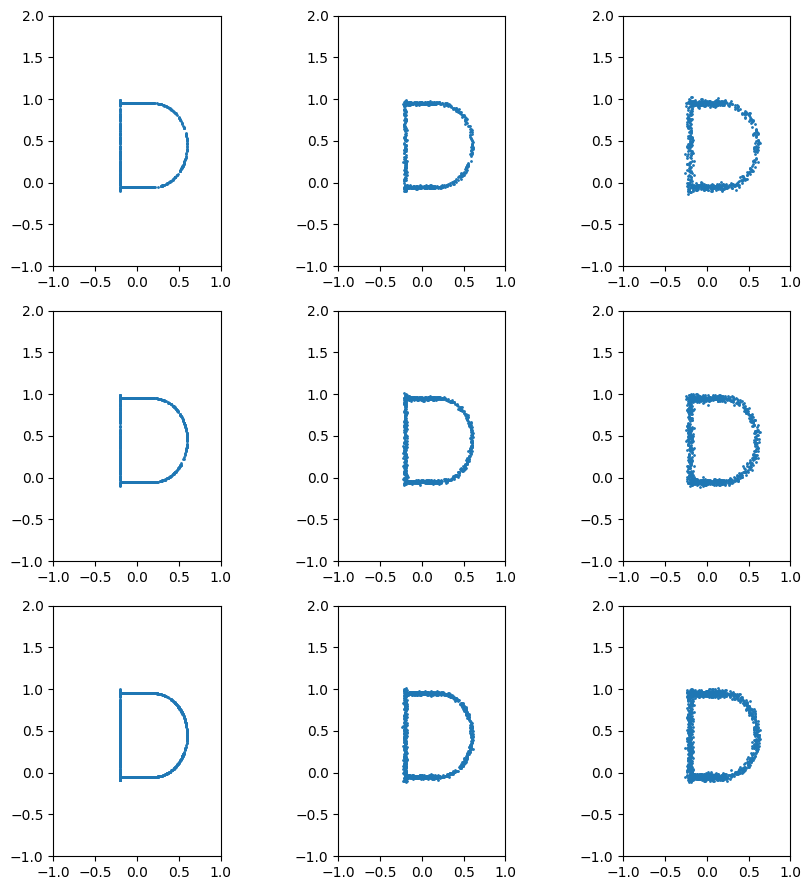

In [18]:

def generate_letter_D_variable(num_points=1000, noise_std=0.0):
    points = []
    # Vertical stem
    t = np.random.rand(num_points // 3)
    points.extend(t[:, None] * np.array([0.0, 1.0]) + (1 - t)[:, None] * np.array([0.0, -0.1]))
    # Right curve (semi-circle)
    angles = np.random.rand(num_points // 3) * np.pi - np.pi/2  # -90 to +90 degrees
    x = 0.4 * np.cos(angles) + 0.4
    y = 0.5 * np.sin(angles) + 0.45
    points.extend(np.column_stack([x, y]))
    # Connecting straight section
    t = np.random.rand(num_points // 3)
    points.extend(t[:, None] * np.array([0.0, 0.95]) + (1 - t)[:, None] * np.array([0.4, 0.95]))
    points.extend(t[:, None] * np.array([0.0, -0.05]) + (1 - t)[:, None] * np.array([0.4, -0.05]))
    points = np.array(points)
    points[:, 0] -= 0.2  # Center
    if noise_std > 0:
        points += np.random.normal(0, noise_std, points.shape)
    return points
# Generate samples with different parameters
sample_d = []
for points in [500, 700, 1000]:
    for noise in [0, 0.01, 0.02]:
        sample = generate_letter_D_variable(points, noise)
        sample_d.append(sample)
# Draw samples
draw_alphabet(sample_d, ['D'] * len(sample_d))

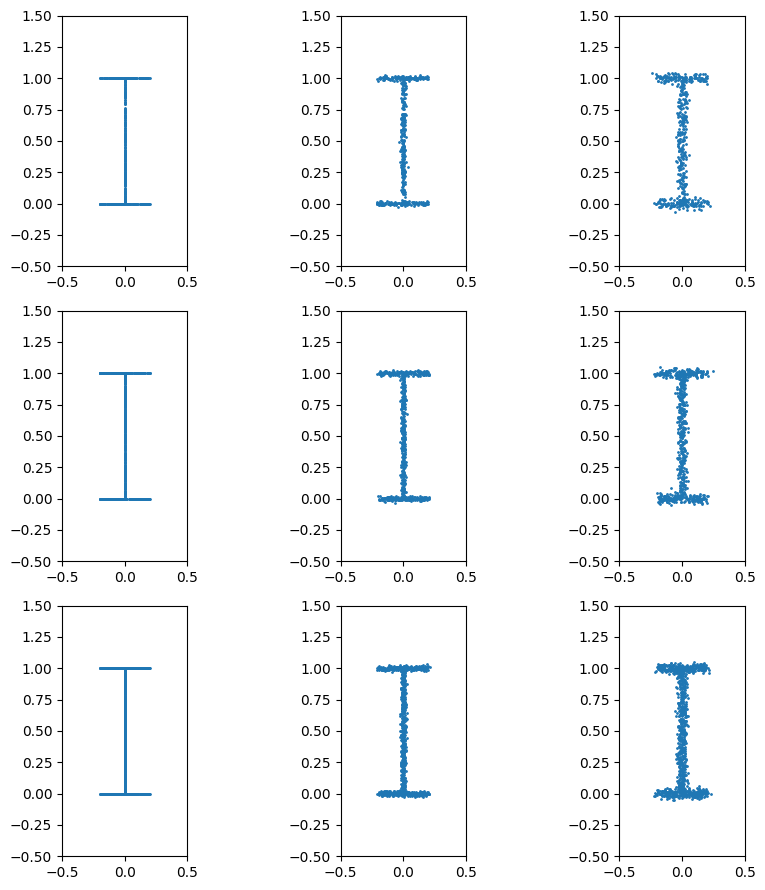

In [5]:
def generate_letter_I_variable(num_points=1000, noise_std=0.0):
    points = []
    # Vertical stem (main body of I)
    t = np.random.rand(num_points // 2)
    points.extend(t[:, None] * np.array([0.0, 1.0]) + (1 - t)[:, None] * np.array([0.0, 0.0]))
    # Top horizontal bar
    t = np.random.rand(num_points // 4)
    points.extend(t[:, None] * np.array([-0.2, 0.0]) + (1 - t)[:, None] * np.array([0.2, 0.0]))
    # Bottom horizontal bar
    t = np.random.rand(num_points // 4)
    points.extend(t[:, None] * np.array([-0.2, 1.0]) + (1 - t)[:, None] * np.array([0.2, 1.0]))
    points = np.array(points)
    points[:, 0] -= 0.0  # Already centered
    if noise_std > 0:
        points += np.random.normal(0, noise_std, points.shape)
    return points
# Generate samples with different parameters
sample_i = []
for points in [500, 700, 1000]:
    for noise in [0, 0.01, 0.02]:
        sample = generate_letter_I_variable(points, noise)
        sample_i.append(sample)

# draw the samples
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for ax, sample in zip(axes.flatten(), sample_i):
    ax.scatter(sample[:, 0], sample[:, 1], s=1)
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_aspect('equal')
plt.tight_layout()
plt.show()

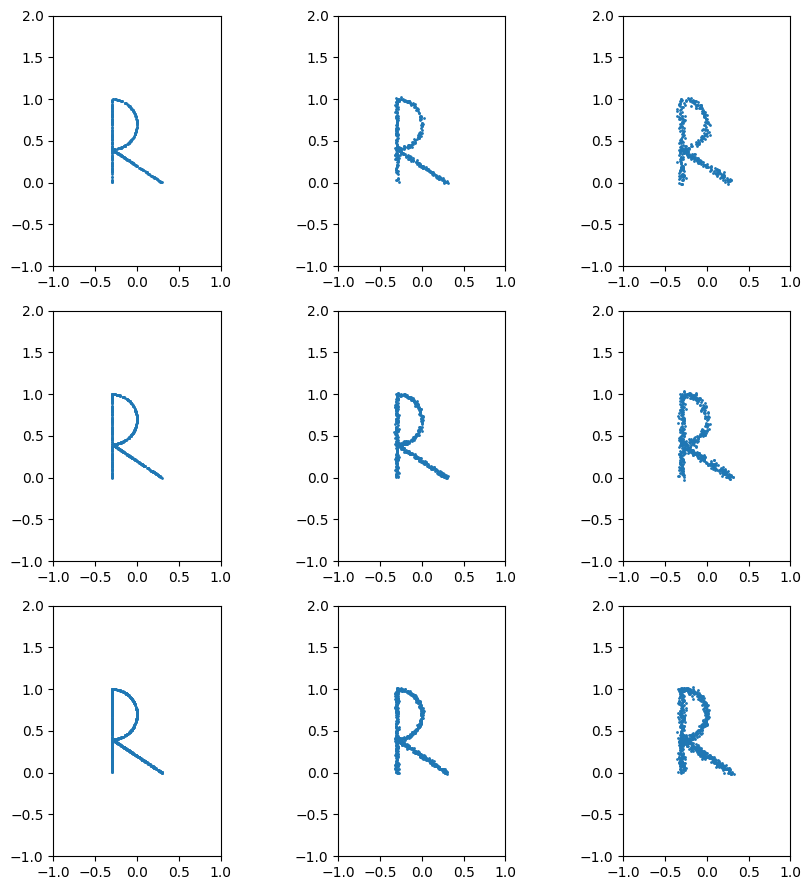

In [30]:
def generate_letter_R_variable(num_points=1000, noise_std=0.0):
    points = []
    
    # Vertical stem
    t = np.random.rand(num_points // 4)
    points.extend(t[:, None] * np.array([0.0, 1.0]) + (1 - t)[:, None] * np.array([0.0, 0.0]))
    
    # Top curve (semi-circle like in P)
    angles = np.random.rand(num_points // 4) * np.pi - np.pi/2  # -90 to +90 degrees
    x = 0.3 * np.cos(angles) + 0.0
    y = 0.3 * np.sin(angles) + 0.7
    points.extend(np.column_stack([x, y]))
    
    # Diagonal leg (from middle to bottom right)
    t = np.random.rand(num_points // 4)
    points.extend(t[:, None] * np.array([0, 0.4]) + (1 - t)[:, None] * np.array([0.6, 0.0]))
    
    # # Connecting straight sections
    # t = np.random.rand(num_points // 4)
    # points.extend(t[:, None] * np.array([0.0, 0.7]) + (1 - t)[:, None] * np.array([0.3, 0.7]))
    # points.extend(t[:, None] * np.array([0.0, 0.4]) + (1 - t)[:, None] * np.array([0.3, 0.4]))
    
    points = np.array(points)
    points[:, 0] -= 0.3  # Center
    
    if noise_std > 0:
        points += np.random.normal(0, noise_std, points.shape)
    
    return points

# Generate samples with different parameters
sample_r = []
for points in [500, 700, 1000]:
    for noise in [0, 0.01, 0.02]:
        sample = generate_letter_R_variable(points, noise)
        sample_r.append(sample)

# draw the samples
draw_alphabet(sample_r, ['R'] * len(sample_r))

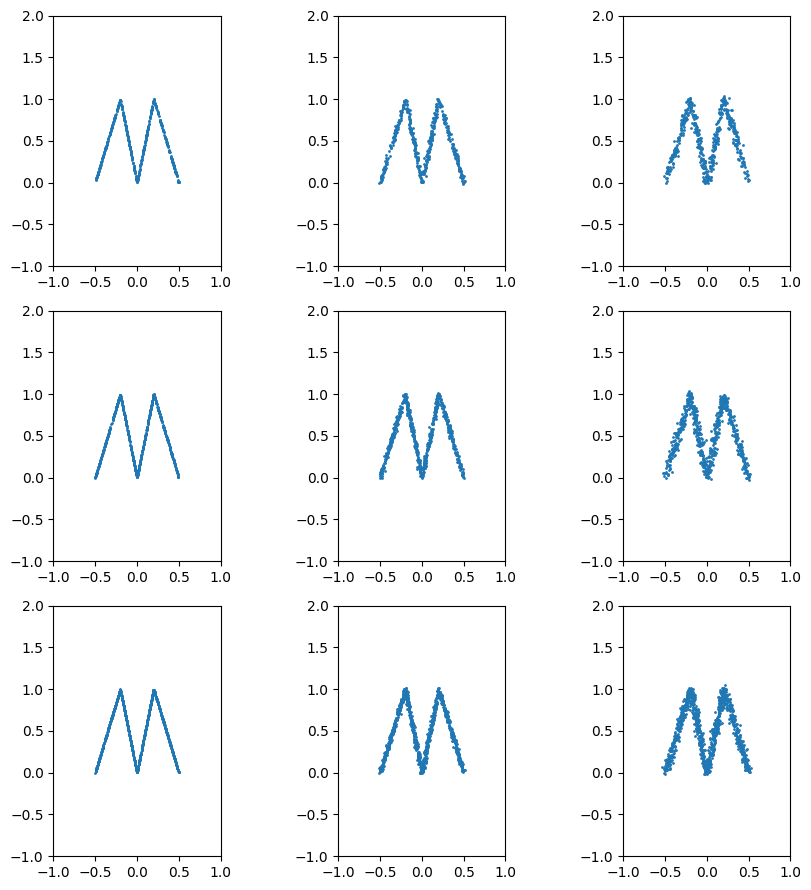

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def generate_letter_M_variable(num_points=1000, noise_std=0.0):
    points = []
    
    # Left diagonal (top left to middle bottom)
    t = np.random.rand(num_points // 4)
    points.extend(t[:, None] * np.array([0.0, 0.0]) + (1 - t)[:, None] * np.array([0.3, 1.0]))
    
    # First V shape (middle bottom to middle top)
    t = np.random.rand(num_points // 4)
    points.extend(t[:, None] * np.array([0.3, 1.0]) + (1 - t)[:, None] * np.array([0.5, 0.0]))
    
    # Second V shape (middle top to right bottom)
    t = np.random.rand(num_points // 4)
    points.extend(t[:, None] * np.array([0.5, 0.0]) + (1 - t)[:, None] * np.array([0.7, 1.0]))
    
    # Right diagonal (middle bottom to top right)
    t = np.random.rand(num_points // 4)
    points.extend(t[:, None] * np.array([0.7, 1.0]) + (1 - t)[:, None] * np.array([1.0, 0.0]))
    
    points = np.array(points)
    points[:, 0] -= 0.5  # Center
    
    if noise_std > 0:
        points += np.random.normal(0, noise_std, points.shape)
    
    return points

# Generate samples with different parameters
sample_m = []
for points in [500, 700, 1000]:
    for noise in [0, 0.01, 0.02]:
        sample = generate_letter_M_variable(points, noise)
        sample_m.append(sample)

# draw the samples
draw_alphabet(sample_m, ['M'] * len(sample_m))

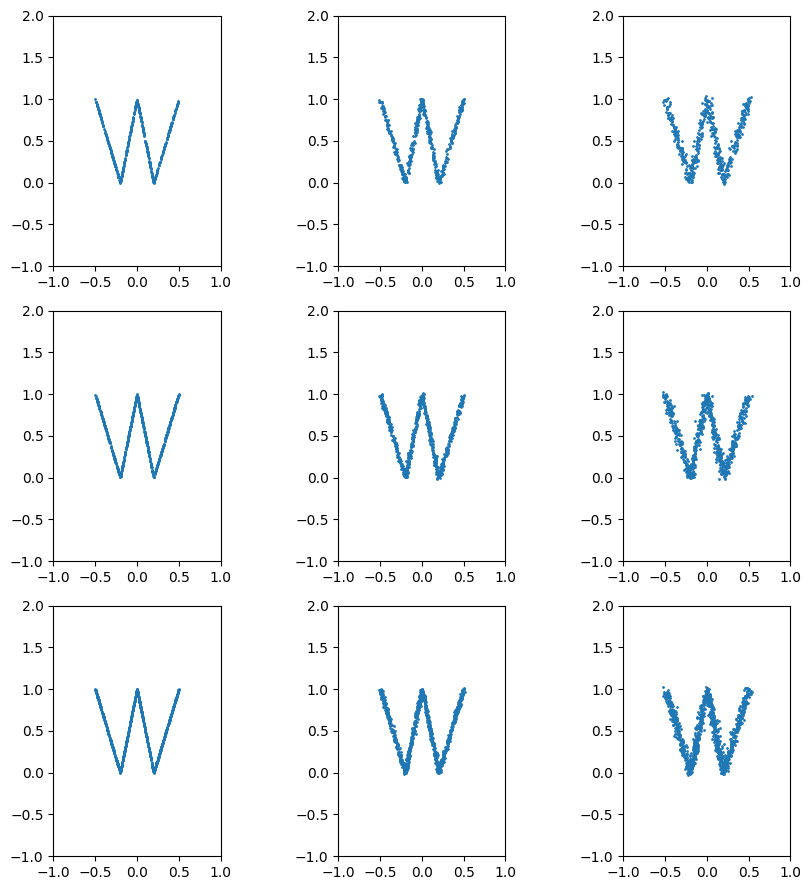

In [26]:
def generate_letter_W_variable(num_points=1000, noise_std=0.0):
    points = []
    
    # Left diagonal (top left to middle bottom)
    t = np.random.rand(num_points // 4)
    points.extend(t[:, None] * np.array([0.0, 1.0]) + (1 - t)[:, None] * np.array([0.3, 0.0]))
    
    # First V shape (middle bottom to middle top)
    t = np.random.rand(num_points // 4)
    points.extend(t[:, None] * np.array([0.3, 0.0]) + (1 - t)[:, None] * np.array([0.5, 1.0]))
    
    # Second V shape (middle top to right bottom)
    t = np.random.rand(num_points // 4)
    points.extend(t[:, None] * np.array([0.5, 1.0]) + (1 - t)[:, None] * np.array([0.7, 0.0]))
    
    # Right diagonal (middle bottom to top right)
    t = np.random.rand(num_points // 4)
    points.extend(t[:, None] * np.array([0.7, 0.0]) + (1 - t)[:, None] * np.array([1.0, 1.0]))
    
    points = np.array(points)
    points[:, 0] -= 0.5  # Center
    
    if noise_std > 0:
        points += np.random.normal(0, noise_std, points.shape)
    
    return points

# Generate samples with different parameters
sample_w = []
for points in [500, 700, 1000]:
    for noise in [0, 0.01, 0.02]:
        sample = generate_letter_W_variable(points, noise)
        sample_w.append(sample)

# draw the samples
draw_alphabet(sample_w, ['W'] * len(sample_w))

In [31]:
letters = { 'A': sample_a,
            'B': sample_b,
            'D': sample_d,
            'I': sample_i,
            'M': sample_m,
            'R': sample_r,
            'W': sample_w}